<a href="https://colab.research.google.com/github/AmanKh9153/asdf/blob/main/Copy_of_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1 : 
Dataset Used : http://ufldl.stanford.edu/housenumbers/

##### Pre Processing :
Reference : https://github.com/aditya9211/SVHN-CNN/blob/master/data_preprocess.ipynb


Imports 

In [ ]:
import h5py
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Q1_Dataset.h5' # please change path accordingly 

In [ ]:
hf = h5py.File(path, 'r')
hf.keys()
with hf as f:
    data = np.array( list(f['X_train']) )
    all_labels = np.array( list(f['y_train']) ) 
    # print(data.shape)
    X_test= np.array(list(f['X_test']))
    # print(X_test.shape)
    y_test = np.array(list(f['y_test']))
    # print(y_test.shape)

In [ ]:
all_labels = all_labels.reshape(data.shape[0], 1)
all_data = np.hstack((data.reshape(data.shape[0],1024), all_labels))
# print(all_data)

In [ ]:
df = pd.DataFrame(all_data)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.091154,0.094069,0.108886,-0.035054,-0.228108,-0.370502,-0.437514,-0.471995,-0.504882,-0.530542,-0.580063,-0.623999,-0.664684,-0.672830,-0.623956,-0.604024,-0.640433,-0.701465,-0.806688,-0.919460,-0.892061,-0.878379,-0.865421,-0.816361,-0.761561,-0.634714,-0.652844,-0.839951,-0.834990,-0.847458,-0.871794,-0.899079,0.101376,0.104630,0.124558,-0.019740,-0.174231,-0.333389,-0.401628,-0.448160,...,-0.995317,-0.933207,-1.018626,-0.867582,-0.822254,-0.883124,-0.886627,0.193325,0.188063,-0.112041,-0.139667,-0.182202,-0.221700,-0.277881,-0.341730,-0.379677,-0.415697,-0.437445,-0.435429,-0.463085,-0.503479,-0.550576,-0.589988,-0.640512,-0.661515,-0.637829,-0.600852,-0.583965,-0.545878,-0.526534,-0.545869,-0.572264,-0.603703,-0.647177,-0.705318,-0.705147,-0.726268,-0.748682,-0.787166,1.0
1,1.301847,1.295418,1.153358,0.655982,0.017951,-0.461645,-0.707210,-0.725850,-0.572881,-0.528181,-0.523158,-0.448617,-0.376608,-0.347844,-0.321914,-0.305100,-0.304707,-0.271561,-0.230996,-0.191878,-0.221475,-0.170686,-0.092828,-0.073471,-0.012328,0.037135,0.095148,0.052667,0.065480,0.095287,0.118887,0.119378,1.378315,1.357356,1.145189,0.529171,-0.110492,-0.384155,-0.505335,-0.593795,...,-0.987409,-0.885600,-0.617739,-0.148655,0.181455,0.256906,0.207978,1.174945,0.903052,0.404966,-0.173665,-0.485416,-0.541277,-0.532657,-0.598046,-0.839037,-0.914997,-0.821171,-0.840171,-0.968145,-1.000431,-0.998879,-1.002875,-0.988887,-0.943479,-0.916909,-0.883365,-0.854149,-0.883793,-0.910702,-0.929865,-0.934136,-0.930935,-0.945925,-0.929933,-0.880074,-0.830193,-0.747288,-0.674082,1.0
2,-0.529552,-0.236574,0.007812,0.140074,0.203421,0.236996,0.381852,0.553650,0.555418,0.600177,0.670829,0.644946,0.616480,0.618006,0.646412,0.674114,0.604589,0.617377,0.536868,0.553668,0.662648,0.636666,0.584211,0.597570,0.711236,0.706752,0.589947,0.533974,0.560211,0.642392,0.665375,0.664892,-0.505962,-0.178692,0.136783,0.305066,0.397384,0.405341,0.514769,0.640537,...,-0.014757,-0.155269,-0.088941,0.103951,0.298344,0.518641,0.750141,-0.228494,0.094326,0.450848,0.605006,0.769319,0.793748,0.781105,0.784750,0.777870,0.720903,0.710407,0.707349,0.708757,0.678358,0.584596,0.412023,0.330041,0.225713,0.347084,0.466433,0.562169,0.582480,0.520327,0.451302,0.343403,0.154809,0.025927,0.065976,0.223514,0.369113,0.543338,0.742894,1.0
3,1.021023,0.963068,0.803935,0.582933,0.368136,0.101616,-0.104632,-0.160637,-0.106747,-0.086385,-0.155577,-0.225588,-0.256510,-0.253823,-0.245636,-0.254115,-0.283182,-0.386294,-0.628576,-0.886667,-1.083708,-1.252700,-1.372949,-1.355514,-1.278086,-1.151590,-0.988305,-0.808770,-0.645343,-0.494227,-0.384166,-0.343815,1.060053,1.002043,0.841545,0.618540,0.390647,0.134277,-0.072269,-0.127469,...,0.474016,0.506628,0.514857,0.566306,0.632127,0.698572,0.712047,1.750743,1.739208,1.681717,1.608730,1.479825,1.292003,1.103905,0.958266,0.855235,0.760160,0.709273,0.692549,0.728804,0.811602,0.890908,0.903787,0.891907,0.822575,0.701350,0.547918,0.458497,0.408288,0.400891,0.437943,0.521462,0.576091,0.585242,0.569211,0.600704,0.668983,0.723489,0.737075,1.0
4,-0.294719,-0.306115,-0.340953,-0.354385,-0.341010,-0.322155,-0.291384,-0.281766,-0.272193,-0.268195,-0.279496,-0.317559,-0.340173,-0.375647,-0.429494,-0.493470,-0.550043,-0.599086,-0.610268,-0.573450,-0.503211,-0.393117,-0.307751,-0.263031,-0.260958,-0.275697,-0.315963,-0.353692,-0.401644,-0.514801,-0.681498,-0.748798,-0.346987,-0.364244,-0.398697,-0.410568,-0.387154,-0.366403,-0.336116,-0.324847,...,-0.172921,-0.273850,-0.385259,-0.508208,-0.686105,-0.905513,-1.001025,-0.339535,-0.376414,-0.459476,-0.479039,-0.382849,-0.277756,-0.202710,-0.137382,-0.090882,-0.076081,-0.081836,-0.092613,-0.148057,-0.215765,-0.265490,-0.292964,-0.321418,-0.326

In [ ]:
test_labels = np.array(y_test).reshape(y_test.shape[0],1)
all_test_data = np.hstack((X_test, test_labels))
# print(all_test_data)

In [ ]:
test_A = all_test_data[np.where(all_test_data[:,1024] == 9)]
test_B = all_test_data[np.where(all_test_data[:,1024] == 1)]
# print(test_A.shape)
# print(test_B.shape)

In [ ]:
def random_rows_funct(data,size):
    number_of_rows = data.shape[0]
    random_indices = np.random.choice(number_of_rows, size= size, replace=False)

    random_rows =data[random_indices, :]
    return random_rows



In [ ]:
sample_A = random_rows_funct(test_A,10)
sample_B = random_rows_funct(test_B,10)
print(sample_A.shape)
print(sample_B.shape)
sample_AB  = np.vstack((sample_A,sample_B))

(10, 1025)
(10, 1025)


In [ ]:
sample_X_AB= sample_AB[:, 0:1024]
sample_y_AB = sample_AB[:,1024]
print(sample_X_AB.shape, sample_y_AB)

(20, 1024) [9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### 1. (5 marks) Compute the Data Covariance matrix for each class (e.g., digit, character) separately and then entire dataset. 

#### Covariance of whole data 

In [ ]:
standardized_data = StandardScaler().fit_transform(data) # standardisation
print(standardized_data.shape)

(63733, 1024)


In [ ]:
covar_matrix = np.matmul(standardized_data.T , standardized_data )/(standardized_data.shape[0])  # calculating covariance matrix

In [ ]:
print("Covariance Matrix:")
print(covar_matrix)
# print(covar_matrix.shape)

Covariance Matrix:
[[1.0000002  0.99105203 0.9665629  ... 0.5338433  0.5223842  0.5135062 ]
 [0.99105203 0.99999994 0.98884654 ... 0.54560876 0.53292054 0.5229866 ]
 [0.9665629  0.98884654 1.0000002  ... 0.5600081  0.54575276 0.5345742 ]
 ...
 [0.5338433  0.54560876 0.5600081  ... 1.0000004  0.9851995  0.9555973 ]
 [0.5223842  0.53292054 0.54575276 ... 0.9851995  0.9999999  0.9879572 ]
 [0.5135062  0.5229866  0.5345742  ... 0.9555973  0.9879572  1.        ]]


#### Covariance of all classes



In [ ]:
cum_var = [] # stores variences of each covarience matrix
covar_matrices = [] # stores covarience matrices for each class 
col = 1024 # number of features 
for i in range(10):
    new_df = df[df[col] == i]  # creating new df with rows of class i 
    data = new_df
    data = data.drop( 1024, axis = 1 )
    standardized_data_class = StandardScaler().fit_transform(data) # standardisation of class data 
    # print("Shape of standardized data\n", standardized_data_class.shape)
    covar_matrix_class = np.matmul(standardized_data_class.T , standardized_data_class)/all_data.shape[0]# calculating the covariance matrix of each class 
    # print('Shape of covarience Matrix\n', covar_matrix_class.shape)
    

    
    covar_matrices.append(covar_matrix_class)
    cum_var.append(covar_matrix_class.trace())
    
    print("Covariance Matrix for digit", i, ':',  cum_var[i])
    print(np.array(covar_matrix_class))
cum_var = np.array(cum_var)
covar_matrices = np.array(covar_matrices)

Covariance Matrix for digit 0 : 69.40956
[[0.06778277 0.067267   0.06593367 ... 0.04081539 0.03915859 0.03808665]
 [0.067267   0.0677828  0.06717949 ... 0.0410823  0.03940812 0.03831067]
 [0.06593367 0.06717949 0.06778278 ... 0.04113872 0.03940703 0.03824806]
 ...
 [0.04081539 0.0410823  0.04113872 ... 0.06778279 0.06663638 0.06451681]
 [0.03915859 0.03940812 0.03940703 ... 0.06663638 0.06778277 0.06698429]
 [0.03808665 0.03831067 0.03824806 ... 0.06451681 0.06698429 0.0677828 ]]
Covariance Matrix for digit 1 : 193.07748
[[0.18855223 0.18685965 0.18190184 ... 0.09227397 0.09089343 0.08980075]
 [0.18685965 0.18855225 0.18630476 ... 0.09513947 0.09359233 0.0923428 ]
 [0.18190184 0.18630476 0.18855225 ... 0.09845062 0.09670012 0.09527002]
 ...
 [0.09227397 0.09513947 0.09845062 ... 0.18855223 0.18609922 0.1813222 ]
 [0.09089343 0.09359233 0.09670012 ... 0.18609922 0.18855228 0.18655297]
 [0.08980075 0.0923428  0.09527002 ... 0.1813222  0.18655297 0.18855228]]
Covariance Matrix for digit 2

### 2. (2.5 marks) Which class has the minimum and maximum total variance (spread)? Let’s call them class A and B respectively. Provide some example images from class A and B.

In [ ]:
max_var = cum_var.argmax() # finding class with max variance 
min_var = cum_var.argmin()  # finding class with min variance 

In [ ]:
print("Min variance A :", min_var)
print("Max variance B:", max_var)

Min variance A : 9
Max variance B: 1


Sample Images

In [ ]:
# helper function to plot images 
def plot_images(img, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        ax.imshow(img[i])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

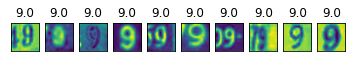

In [ ]:
A_plt = sample_A[:,0:1024].reshape((10,32,32))
plot_images(A_plt, sample_A[:,1024], 1, 10)

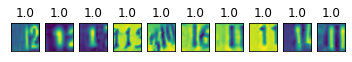

In [ ]:
B_plt = sample_B[:,0:1024].reshape((10,32,32))
plot_images(B_plt, sample_B[:,1024], 1, 10)

### 3. (2.5 marks) Perform normalization on the data from each class. Which method is more appropriate here?

It is mandatory before applying PCA to convert mean=0 and standard deviation =1 for each variable. So we use  StandardScaler() from sklearn which uses scalar z-normalisation

### 4. (10 marks) Use PCA and related techniques (https://scikitlearn.org/stable/modules/decomposition.html#decompositions ) to visualize the data in class A and B individually and together. Are the two classes distinguishable?

In [ ]:
df_A = pd.DataFrame(all_data).loc[df[1024] == 9]
df_B = pd.DataFrame(all_data).loc[df[1024] == 1]
labels_A = df_A[[1024]]
labels_B = df_B[[1024]]
df_A.drop(df.columns[[1024]], axis = 1, inplace = True)
df_B.drop(df.columns[[1024]], axis = 1, inplace = True)
data_A = df_A.to_numpy()
data_B = df_B.to_numpy()

In [ ]:
df_AB= pd.DataFrame(all_data) 
df_AB = df_AB.loc[(df[1024] == 9) | (df[1024] == 1)]
labels_AB = df_AB[[1024]]
df_AB.drop(df.columns[[1024]], axis = 1, inplace = True)
data_AB= df_AB.to_numpy()

#### i. PCA 

##### Class A

In [ ]:
values, vectors = eigh(covar_matrices[9], eigvals=(1022,1023)) # covariance matrix of digit 9 (class A) is covar_matrices[9]
print('Shape of eigen vectors =',vectors.shape)
vectors = vectors.T
print('Updated shape of eigen vectors =',vectors.shape)

In [ ]:
new_coordinates = np.matmul(vectors, data_A.T)
print (" resultanant new data points' shape ", vectors.shape, "X", data_A.T.shape," = ", new_coordinates.shape)

In [ ]:
print(new_coordinates.shape, labels_A.shape)
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels_A.T)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

In [ ]:
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

##### Class B

In [ ]:
values, vectors = eigh(covar_matrices[1], eigvals=(1022,1023))
print('Shape of eigen vectors =',vectors.shape)
vectors = vectors.T
print('Updated shape of eigen vectors =',vectors.shape)

In [ ]:
new_coordinates = np.matmul(vectors, data_B.T)
print (" resultanat new data points' shape ", vectors.shape, "X", data_B.T.shape," = ", new_coordinates.shape)

In [ ]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels_B.T)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

In [ ]:
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

##### Combined

In [ ]:
standardized_data_AB = StandardScaler().fit_transform(data_AB)
print("Shape of standardized data\n", standardized_data_AB.shape)
covar_matrix_AB = np.matmul(standardized_data_AB.T , standardized_data_AB)/all_data.shape[0]
print('Shape of covarience Matrix\n', covar_matrix_AB.shape)

In [ ]:
values, vectors = eigh(covar_matrix_AB, eigvals=(1022,1023))
print('Shape of eigen vectors =',vectors.shape)
vectors = vectors.T
print('Updated shape of eigen vectors =',vectors.shape)

In [ ]:
new_coordinates = np.matmul(vectors, data_AB.T)
print (" resultanat new data points' shape ", vectors.shape, "X", data_AB.T.shape," = ", new_coordinates.shape)

In [ ]:
# appending label to the 2d projected data(vertical stack)
new_coordinates = np.vstack((new_coordinates, labels_AB.T)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

In [ ]:
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Distinguishable ? 

No

#### ii. Kernal PCA

##### Class A 

In [ ]:
kpca_A = KernelPCA(n_components=2, kernel='linear', gamma=0.01)
standardized_data_A = StandardScaler().fit_transform(data_A)
Xkpca_A = kpca_A.fit_transform(standardized_data_A)
print(Xkpca_A.shape) 

(4044, 2)


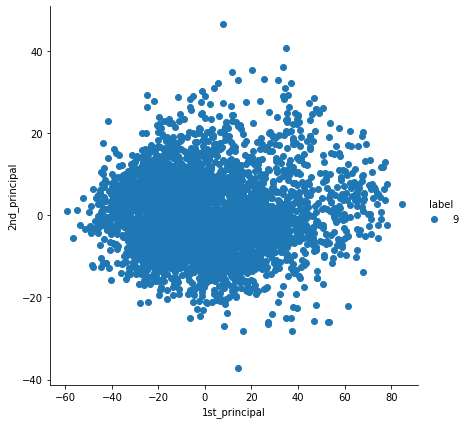

In [ ]:
Xkpca_A_df = pd.DataFrame(Xkpca_A, columns = ['1st_principal', '2nd_principal'])
Xkpca_A_df ['label'] = 9
sn.FacetGrid(Xkpca_A_df , hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

##### Class B

In [ ]:
kpca_B = KernelPCA(n_components=2, kernel='linear', gamma=0.01)
standardized_data_B = StandardScaler().fit_transform(data_B)
Xkpca_B = kpca_B.fit_transform(standardized_data_B)
print(Xkpca_B.shape) 

(12017, 2)


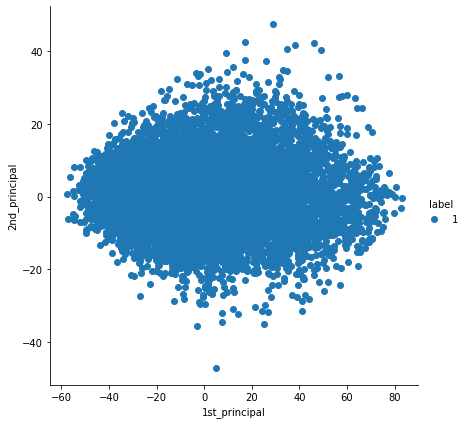

In [ ]:
Xkpca_B_df = pd.DataFrame(Xkpca_B, columns = ['1st_principal', '2nd_principal'])
Xkpca_B_df ['label'] = 1
sn.FacetGrid(Xkpca_B_df , hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

##### Combined 

In [ ]:
kpca_AB = KernelPCA(n_components=2, kernel='linear', gamma=0.01)
standardized_data_AB=StandardScaler().fit_transform(data_AB)
Xkpca_AB = kpca_AB.fit_transform(standardized_data_AB)
print(Xkpca_AB.shape) 

(16061, 2)


   1st_principal  2nd_principal  label
0     -17.960995      -0.714809    1.0
1      -3.426825       4.388482    1.0
2      13.950379      -4.115079    1.0
3       3.672723      -9.767338    1.0
4      17.780668     -19.659382    NaN


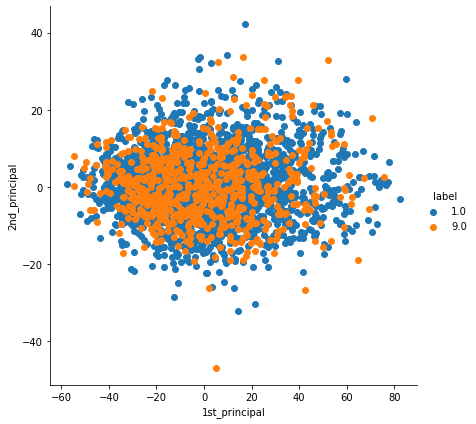

In [ ]:
Xkpca_B_df = pd.DataFrame(Xkpca_B, columns = ['1st_principal', '2nd_principal'])
Xkpca_B_df ['label'] = labels_AB
print(Xkpca_B_df.head())
sn.FacetGrid(Xkpca_B_df , hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

##### Distingushable ?

No

### 5. (5 marks) Take 10 random test images from the test set of classes A and B each. Assuming that the distribution of each class is a multi-variate normal (with parameters same as that of the sample covariance matrix for that class), compute the probability of each image belonging to class A and B. How accurate is your classifier?

In [ ]:
random_state = 0
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))
model = pca

In [ ]:
model.fit(data_AB, labels_AB)
clf = GaussianNB()
clf.partial_fit(model.transform(data_AB), labels_AB,np.unique(labels_AB)) # first 10 belong to class A (9) and rest belong to class B (1)
print("Probabilities", clf.predict_proba(model.transform(sample_X_AB))) # probablitity that sample belongs to [A, B] respectively
print(clf.score(model.transform(sample_X_AB), sample_y_AB)) # accuracy

Probabilities [[0.74714291 0.25285709]
 [0.6950713  0.3049287 ]
 [0.71866756 0.28133244]
 [0.74173365 0.25826635]
 [0.68579549 0.31420451]
 [0.67989522 0.32010478]
 [0.69319519 0.30680481]
 [0.69211959 0.30788041]
 [0.68922218 0.31077782]
 [0.69688571 0.30311429]
 [0.73519307 0.26480693]
 [0.90070079 0.09929921]
 [0.72853018 0.27146982]
 [0.69681904 0.30318096]
 [0.69736951 0.30263049]
 [0.78446588 0.21553412]
 [0.73403249 0.26596751]
 [0.80270494 0.19729506]
 [0.74701509 0.25298491]
 [0.73104203 0.26895797]]
0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###### Using only the distributions of each class

We assume that we know the distributions of classes A and B and it is multi variant normal.
Then we try to fit the test images to both these distibutions and find the prob of them belonging to either class  

Class A

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [ ]:
x_A = StandardScaler().fit_transform(np.array(sample_X_AB))
print(sample_X_AB)
y_A = multivariate_normal.pdf(x_A,mean=np.mean(x_A,axis=0), cov=covar_matrix_AB);
# print(covar_matrix_AB)
y_A


[[ 1.7590681   1.7368499   1.6930565  ...  1.5278207   1.4998904
   1.4357183 ]
 [-1.6650454  -1.6152278  -1.5118164  ... -1.8927228  -1.8342026
  -1.7934386 ]
 [-0.8319595  -0.83076084 -0.84783757 ... -1.3694695  -1.3875355
  -1.3267233 ]
 ...
 [ 2.2220764   2.2245333   2.2360864  ...  2.3934639   2.3734941
   2.3640356 ]
 [-0.8865062  -0.88983065 -0.8918859  ... -0.83197767 -0.81949747
  -0.79459083]
 [-1.39297    -1.4166288  -1.4374533  ... -1.334344   -1.4286664
  -1.4925677 ]]


/usr/local/lib/python3.7/dist-packages/scipy/stats/_multivariate.py:522: RuntimeWarning: overflow encountered in exp
  out = np.exp(self._logpdf(x, mean, psd.U, psd.log_pdet, psd.rank))


array([2.35380607e+022,             inf, 1.02605225e+230,             inf,
       0.00000000e+000, 5.10214650e-152, 0.00000000e+000,             inf,
                   inf,             inf,             inf,             inf,
                   inf, 0.00000000e+000,             inf,             inf,
                   inf,             inf,             inf,             inf])

Class B

In [ ]:
x_B = np.linspace(0, 5, 10, endpoint=False)
y_B = multivariate_normal.pdf(x, mean=2.5, cov=0.5);

### 6. (5 marks) Repeat the above exercise with a 5-nearest neighbor approach in lower dimensions using your favorite dimensionality reduction technique. 

In [ ]:
n_neighbors = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [ ]:
model.fit(data_AB, labels_AB)
knn.fit(model.transform(data_AB), labels_AB) 
# first 10 belong to class A (9) and rest belong to class B (1)
print("Probabilities:\n", knn.predict_proba(model.transform(sample_X_AB))) # probablitity that sample belongs to [A, B] respectively
acc_knn_AB = knn.score(model.transform(sample_X_AB), sample_y_AB)  # accuracy
print(acc_knn_AB) 

Probabilities:
 [[0.4 0.6]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [0.4 0.6]
 [0.8 0.2]
 [0.  1. ]
 [1.  0. ]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [0.8 0.2]
 [0.8 0.2]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]]
0.65


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
